# Step 1: Install Fast.ai
First, ensure you have Fast.ai and PyTorch installed. Fast.ai will install PyTorch as a dependency if it's not already installed.

In [ ]:
pip install fastai

# Step 2: Import Necessary Libraries

In [5]:
from fastai.vision.all import *
from torchvision.models import mobilenet_v2, MobileNet_V2_Weights


# Step 3 (Optional) Empty the cache for GPU usage

In [15]:
torch.cuda.empty_cache()

# Step 3: Prepare the Data
Fast.ai provides convenient functions to load and preprocess data. The library includes the CIFAR-10 dataset, so you can easily download and prepare it for training.

In [16]:
path = untar_data(URLs.CIFAR)
dls = ImageDataLoaders.from_folder(path, valid_pct=0.2, seed=42,
                                   item_tfms=Resize(64),
                                   batch_tfms=aug_transforms(mult=2),
                                   bs=32, num_workers=4)

# Load the pre-trained MobileNet V2 model


In [17]:
# Load the pre-trained MobileNet V2 model
pretrained_model = mobilenet_v2(weights=MobileNet_V2_Weights.IMAGENET1K_V1).to('cuda')


# Now create a Fast.ai learner with this model


In [18]:

# Now create a Fast.ai learner with this model
learn = Learner(dls, pretrained_model, metrics=accuracy)

In [22]:
# Access the Number of Input Features for the Last Layer
num_features = learn.model.classifier[1].in_features
# Replace the Last Layer with a New Linear Layer
learn.model.classifier[1] = nn.Linear(num_features, dls.c)

# Find the optimal learning rate


SuggestedLRs(valley=0.0003311311302240938)

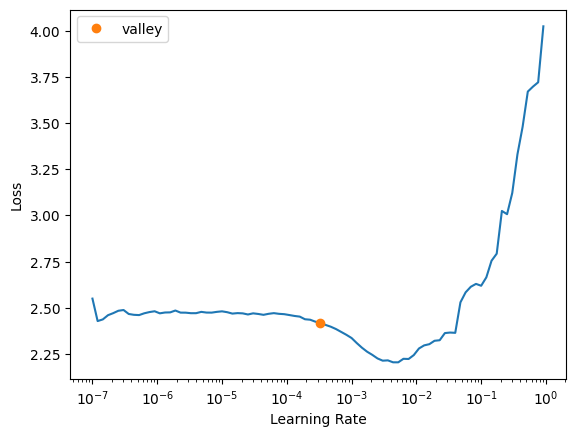

In [20]:
# Find the optimal learning rate
learn.lr_find()

In [21]:
learn.fine_tune(5, base_lr=1e-3)

epoch,train_loss,valid_loss,accuracy,time
0,0.970241,0.729070,0.759417,01:15


epoch,train_loss,valid_loss,accuracy,time
0,0.612612,0.442964,0.844417,01:08
1,0.595788,0.463680,0.845667,01:09
2,0.461155,0.336483,0.880583,01:18
3,0.408756,0.278279,0.903417,01:19
4,0.338498,0.254088,0.910000,01:20
